In [1]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt 
import seaborn as sns
from patsy import dmatrices

In [2]:
data=pd.read_csv('G:/kaggle/project4/Dataset/train.csv')
building_structure=pd.read_csv('G:/kaggle/project4/Dataset/Building_Structure.csv')
building_ownership=pd.read_csv('G:/kaggle/project4/Dataset/Building_Ownership_Use.csv')

In [3]:
data.shape

(631761, 14)

In [4]:
building_structure.shape

(1052948, 29)

In [5]:
building_ownership.shape

(1052948, 17)

In [6]:
data.damage_grade.value_counts()

Grade 5    210825
Grade 4    152244
Grade 3    122288
Grade 2     85084
Grade 1     61320
Name: damage_grade, dtype: int64

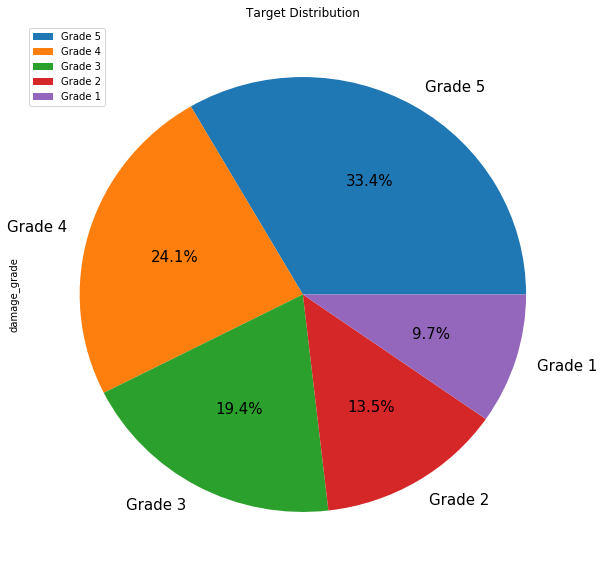

In [8]:
target_distribution = data['damage_grade'].value_counts()
target_distribution.plot.pie(figsize=(10, 10),
                             title='Target Distribution',
                             fontsize=15, 
                             legend=True, 
                             autopct=lambda v: "{:0.1f}%".format(v))

In [6]:
data=pd.merge(data,building_structure,on='building_id')

In [7]:
data.shape

(631761, 42)

In [8]:
data=pd.merge(data,building_ownership,on='building_id')

In [9]:
data.shape

(631761, 58)

In [11]:
data.head()

,area_assesed,building_id,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data.dtypes

area_assesed                               object
building_id                                object
damage_grade                               object
district_id_x                               int64
has_geotechnical_risk                     float64
has_geotechnical_risk_fault_crack           int64
has_geotechnical_risk_flood                 int64
has_geotechnical_risk_land_settlement       int64
has_geotechnical_risk_landslide             int64
has_geotechnical_risk_liquefaction          int64
has_geotechnical_risk_other                 int64
has_geotechnical_risk_rock_fall             int64
has_repair_started                        float64
vdcmun_id_x                                 int64
district_id_y                               int64
vdcmun_id_y                                 int64
ward_id_x                                   int64
count_floors_pre_eq                         int64
count_floors_post_eq                        int64
age_building                                int64


In [ ]:
sns.pairplot(data);

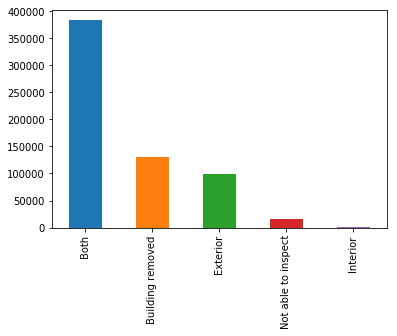

In [9]:
data["area_assesed"].value_counts().plot('bar')

In [8]:
data.isnull().sum()

area_assesed                                  0
building_id                                   0
damage_grade                                  0
district_id_x                                 0
has_geotechnical_risk                         0
has_geotechnical_risk_fault_crack             0
has_geotechnical_risk_flood                   0
has_geotechnical_risk_land_settlement         0
has_geotechnical_risk_landslide               0
has_geotechnical_risk_liquefaction            0
has_geotechnical_risk_other                   0
has_geotechnical_risk_rock_fall               0
has_repair_started                        33417
vdcmun_id_x                                   0
district_id_y                                 0
vdcmun_id_y                                   0
ward_id_x                                     0
count_floors_pre_eq                           0
count_floors_post_eq                          0
age_building                                  0
plinth_area_sq_ft                       

In [10]:
data=data.fillna(data.median())

In [7]:
data.isna().sum().sum()

0

In [16]:
data['foundation_type'].value_counts()

Mud mortar-Stone/Brick    531520
Bamboo/Timber              36383
Cement-Stone/Brick         34478
RC                         25878
Other                       3502
Name: foundation_type, dtype: int64

In [11]:
object_columns=['area_assesed','foundation_type','roof_type','ground_floor_type','position','other_floor_type','land_surface_condition',
               'plan_configuration','condition_post_eq','legal_ownership_status']

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
number = LabelEncoder()
for col in object_columns:
    data[col] = number.fit_transform(data[col].astype('str'))

In [11]:
data.dtypes

area_assesed                                int64
building_id                                object
damage_grade                               object
district_id_x                               int64
has_geotechnical_risk                     float64
has_geotechnical_risk_fault_crack           int64
has_geotechnical_risk_flood                 int64
has_geotechnical_risk_land_settlement       int64
has_geotechnical_risk_landslide             int64
has_geotechnical_risk_liquefaction          int64
has_geotechnical_risk_other                 int64
has_geotechnical_risk_rock_fall             int64
has_repair_started                        float64
vdcmun_id_x                                 int64
district_id_y                               int64
vdcmun_id_y                                 int64
ward_id_x                                   int64
count_floors_pre_eq                         int64
count_floors_post_eq                        int64
age_building                                int64


In [14]:
data.head()

,area_assesed,building_id,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data['area_assesed'].value_counts()

0    382992
1    131346
2     99030
4     16575
3      1818
Name: area_assesed, dtype: int64

In [15]:
data=data.drop(columns=['building_id','district_id_y','vdcmun_id_y','ward_id_x'])

In [16]:
data.shape

(631761, 54)

In [17]:
duplicates = data.duplicated(keep=False)
data = data[~duplicates]
data.shape

(619836, 54)

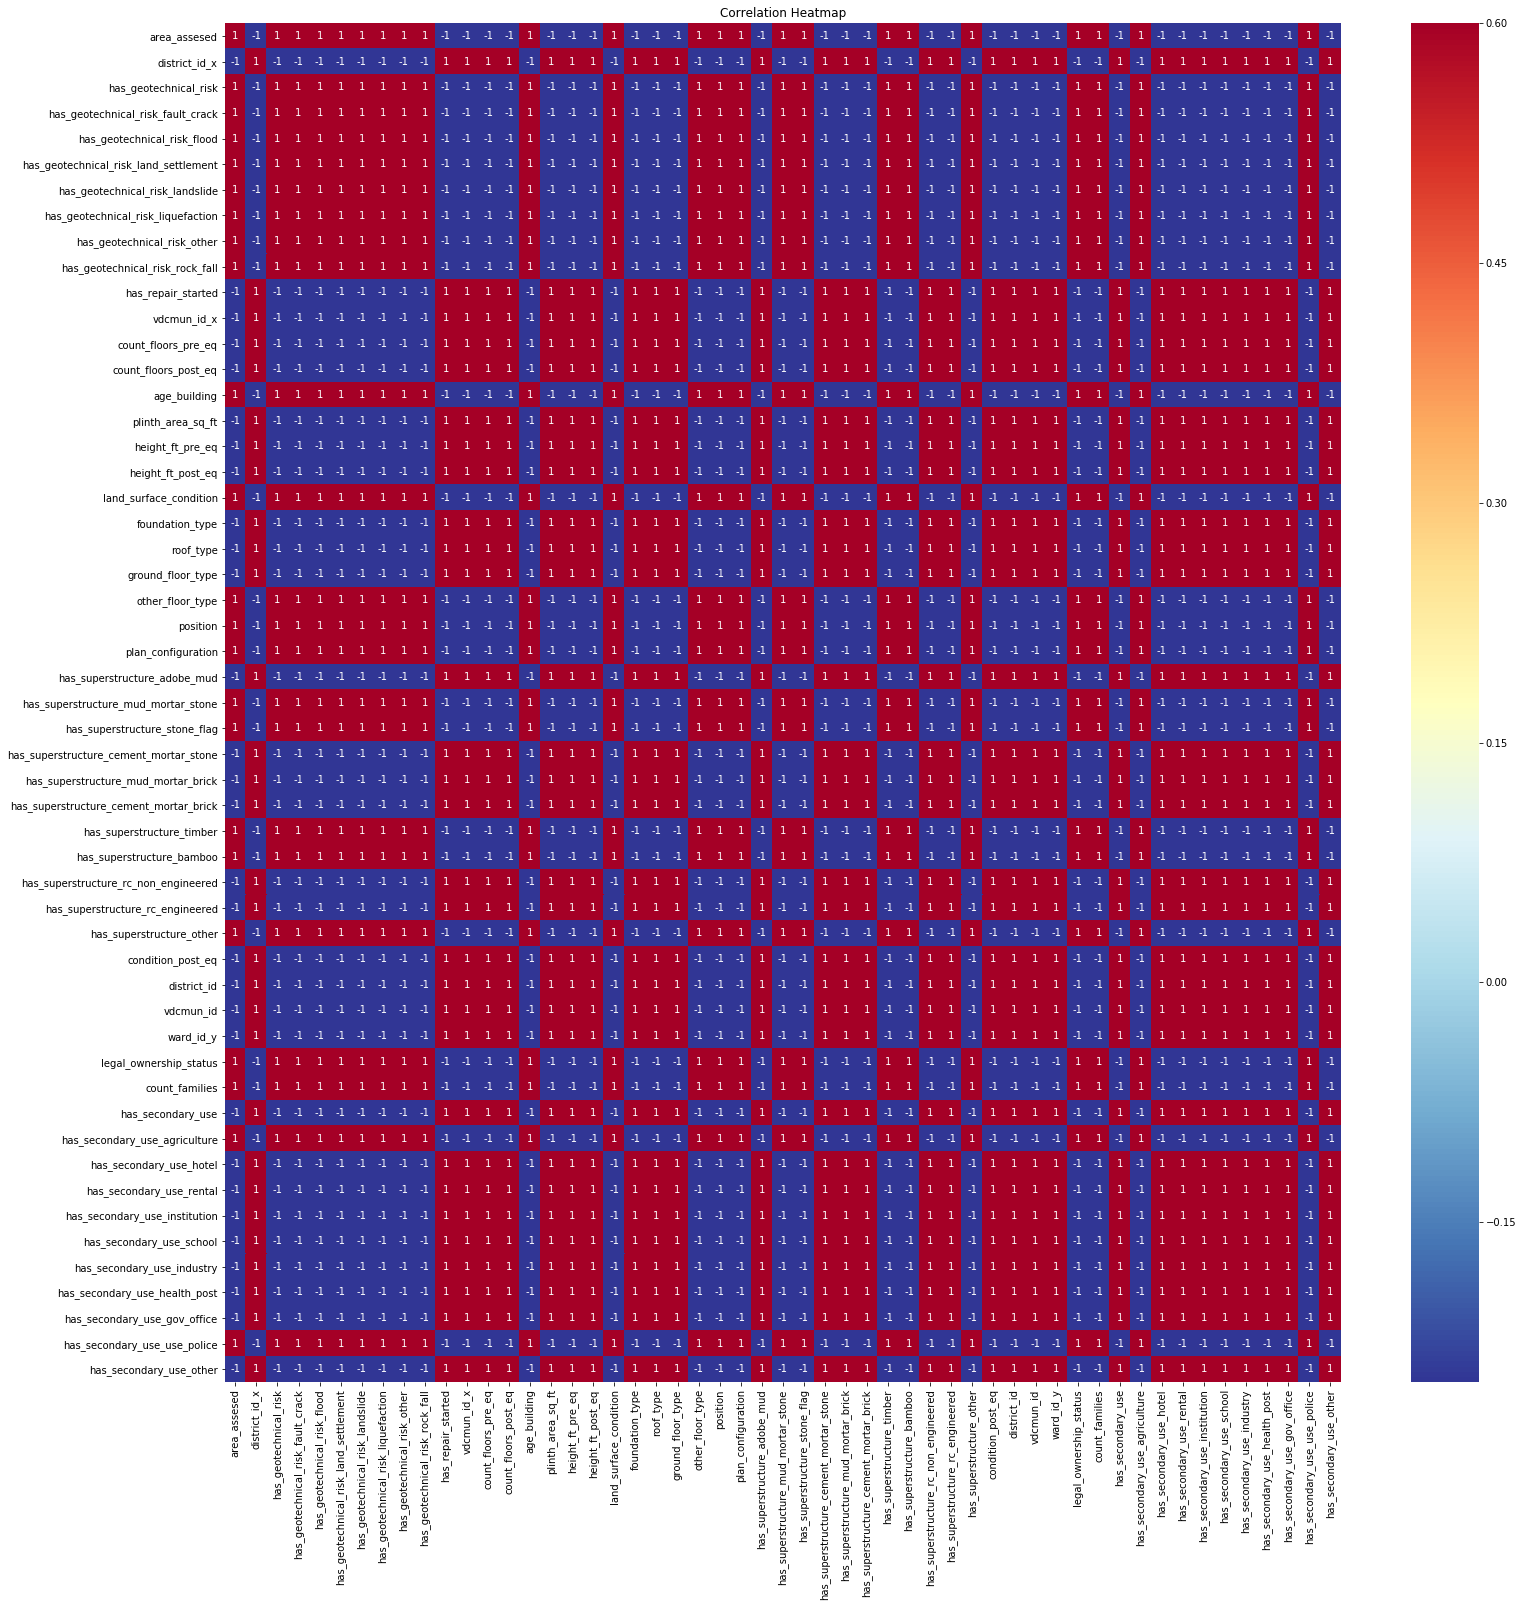

In [26]:
data = data.corr()
plt.figure(figsize = (25,25))
sns.heatmap(data, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

In [18]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [19]:
to_drop

['vdcmun_id_x', 'district_id', 'vdcmun_id', 'ward_id_y']

In [20]:
new_data = data.drop(columns=to_drop)
new_data.shape

(619836, 50)

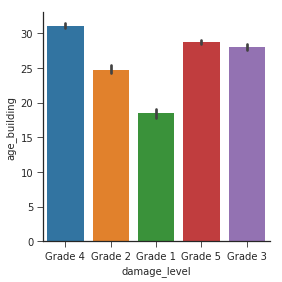

In [31]:
with sns.axes_style(style='ticks'):
    g=sns.factorplot("damage_grade","age_building",data=new_data,kind="bar")
    g.set_axis_labels("damage_level","age_building")

In [21]:
new_data.head()

,area_assesed,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0,Grade 4,24,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,Grade 2,44,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,Grade 1,36,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Grade 5,30,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,Grade 3,36,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
new_data['category_id'] = new_data['damage_grade'].factorize()[0]
category_id_df = new_data[['damage_grade', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'damage_grade']].values)

In [24]:
new_data.head()

,area_assesed,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,category_id
0,0,Grade 4,24,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,Grade 2,44,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,Grade 1,36,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,Grade 5,30,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,Grade 3,36,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [27]:
new_data.columns

Index(['area_assesed', 'damage_grade', 'district_id_x',
       'has_geotechnical_risk', 'has_geotechnical_risk_fault_crack',
       'has_geotechnical_risk_flood', 'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
       'has_repair_started', 'count_floors_pre_eq', 'count_floors_post_eq',
       'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq',
       'height_ft_post_eq', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_sup

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x = new_data.drop(columns=['damage_grade','category_id'])
y= new_data.category_id

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [31]:
from sklearn.svm import LinearSVC

In [32]:
model=LinearSVC()
model.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [42]:
y_pred=model.predict(x_test)

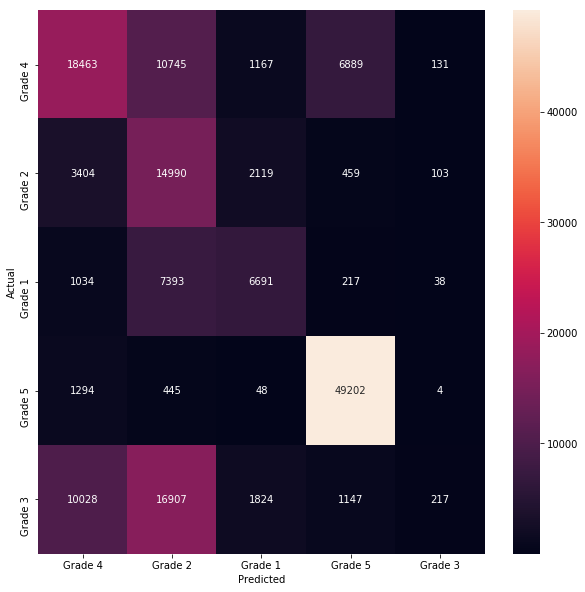

In [43]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.damage_grade.values, yticklabels=category_id_df.damage_grade.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [44]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=new_data['damage_grade'].unique()))

             precision    recall  f1-score   support

    Grade 4       0.54      0.49      0.52     37395
    Grade 2       0.30      0.71      0.42     21075
    Grade 1       0.56      0.44      0.49     15373
    Grade 5       0.85      0.96      0.90     50993
    Grade 3       0.44      0.01      0.01     30123

avg / total       0.59      0.58      0.53    154959



In [47]:
from sklearn.naive_bayes import MultinomialNB

In [49]:
model1=MultinomialNB().fit(x_train,y_train)

In [50]:
p1=model1.predict(x_test)

In [51]:
print(metrics.classification_report(y_test, p1, target_names=new_data['damage_grade'].unique()))

             precision    recall  f1-score   support

    Grade 4       0.49      0.51      0.50     37395
    Grade 2       0.24      0.15      0.19     21075
    Grade 1       0.27      0.66      0.38     15373
    Grade 5       1.00      0.91      0.95     50993
    Grade 3       0.34      0.21      0.26     30123

avg / total       0.57      0.55      0.55    154959



In [52]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=200,max_depth=3)

In [53]:
model2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
p2=model2.predict(x_test)
print(metrics.classification_report(y_test, p2, target_names=new_data['damage_grade'].unique()))

             precision    recall  f1-score   support

    Grade 4       0.42      0.97      0.59     37395
    Grade 2       0.48      0.09      0.15     21075
    Grade 1       0.74      0.56      0.64     15373
    Grade 5       1.00      0.95      0.97     50993
    Grade 3       0.36      0.05      0.10     30123

avg / total       0.64      0.62      0.56    154959



In [56]:
from sklearn.linear_model import LogisticRegression
model3=LogisticRegression()

In [57]:
model3.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
p3=model3.predict(x_test)
print(metrics.classification_report(y_test, p3, target_names=new_data['damage_grade'].unique()))

             precision    recall  f1-score   support

    Grade 4       0.55      0.62      0.58     37395
    Grade 2       0.41      0.18      0.25     21075
    Grade 1       0.60      0.62      0.61     15373
    Grade 5       0.90      0.96      0.93     50993
    Grade 3       0.39      0.43      0.41     30123

avg / total       0.62      0.64      0.62    154959

